In [2]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Glass Identification Dataset. It consists of 214 observations from each of seven types of glasses. Ten features were measured from each sample.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/glass+identification

**Train the KNN algorithm to be able to distinguish the type of glass from one another given the measurements of the 10 features.**

## Question 1 - 1 point

Import the data set and print 10 random rows from the data set

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns
from sklearn import metrics

glassdata = pd.read_csv("D:/D_DATA/CODE/Python/glass.data",names=['Id', 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glasstype'], header=None)
#print(bezdekIris.shape)
#print(bezdekIris.dtypes)
#Answer
glassdata.sample(n=10)

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glasstype
176,177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,0.00,0.00,6
182,183,1.51916,14.15,0.00,2.09,72.74,0.00,10.88,0.00,0.00,6
48,49,1.52223,13.21,3.77,0.79,71.99,0.13,10.02,0.00,0.00,1
187,188,1.52315,13.44,3.34,1.23,72.38,0.60,8.83,0.00,0.00,7
13,14,1.51748,12.86,3.56,1.27,73.21,0.54,8.38,0.00,0.17,1
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2
174,175,1.52058,12.85,1.61,2.17,72.18,0.76,9.70,0.24,0.51,5
144,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
58,59,1.51754,13.48,3.74,1.17,72.99,0.59,8.03,0.00,0.00,1
91,92,1.51605,12.90,3.44,1.45,73.06,0.44,8.27,0.00,0.00,2


## Data Pre-processing

## Question 2 - Check for missing values. - 1 point

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median/mean) *

In [38]:
#print(glassdata.shape)
#print(glassdata.dtypes)

#print(glassdata.isnull().sum())
print(glassdata.isnull().sum().sum())
#print(glassdata.ix["Ba"].value_counts())
#print(glassdata.ix["Fe"].value_counts())

#There are no missing values

0


## Question 3 - Create Box plots for all the independent features to check the outliers - 1 point


(214,)
(214, 9)


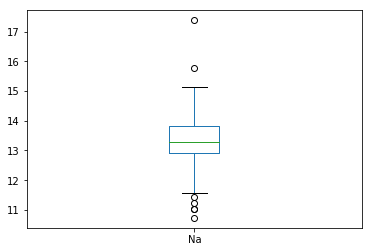

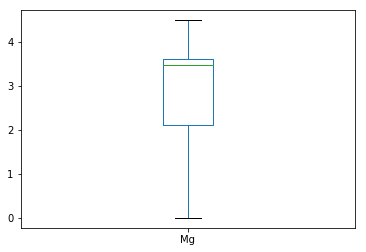

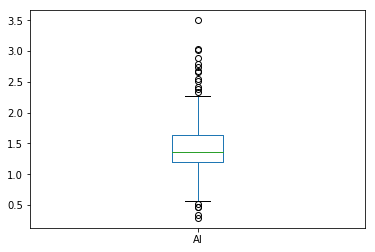

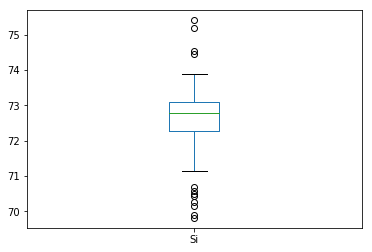

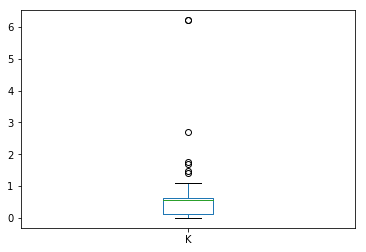

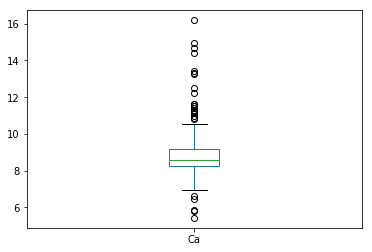

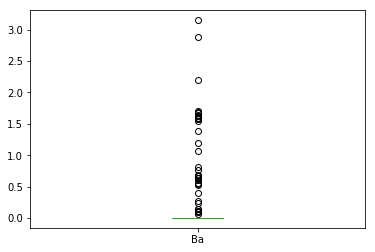

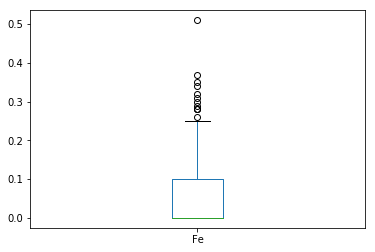

In [39]:
glassdata[['Na']].plot(kind='box')
glassdata[['Mg']].plot(kind='box')
glassdata[['Al']].plot(kind='box')
glassdata[['Si']].plot(kind='box')
glassdata[['K']].plot(kind='box')
glassdata[['Ca']].plot(kind='box')
glassdata[['Ba']].plot(kind='box')
glassdata[['Fe']].plot(kind='box')


#Pre-processing: Extract numerical features and class identifier seperately
glassdata_class = glassdata['glasstype']
print(glassdata_class.shape)
glassdata_features = glassdata.drop(labels = ["glasstype","Id"], axis = 1)
print(glassdata_features.shape)

#glassdata.plot(kind='box')
#ax=sns.boxplot(data=glassdata_features)

## Question 4 - Check for Variance- 1 point

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [40]:

print(glassdata_features.var() )
print(glassdata_features.var() < 0.1)

glassdata_features_filtered = glassdata_features.drop(labels= "RI" , axis = 1)
glassdata_features_filtered = glassdata_features_filtered.drop(labels= "Fe" , axis = 1)
print(glassdata_features_filtered.var() < 0.1)


print(glassdata_features.describe())


RI    0.000009
Na    0.666841
Mg    2.080540
Al    0.249270
Si    0.599921
K     0.425354
Ca    2.025366
Ba    0.247227
Fe    0.009494
dtype: float64
RI     True
Na    False
Mg    False
Al    False
Si    False
K     False
Ca    False
Ba    False
Fe     True
dtype: bool
Na    False
Mg    False
Al    False
Si    False
K     False
Ca    False
Ba    False
dtype: bool
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500  

## Question 5 - 1 point

*Plot the scatter matrix for all the variables.*

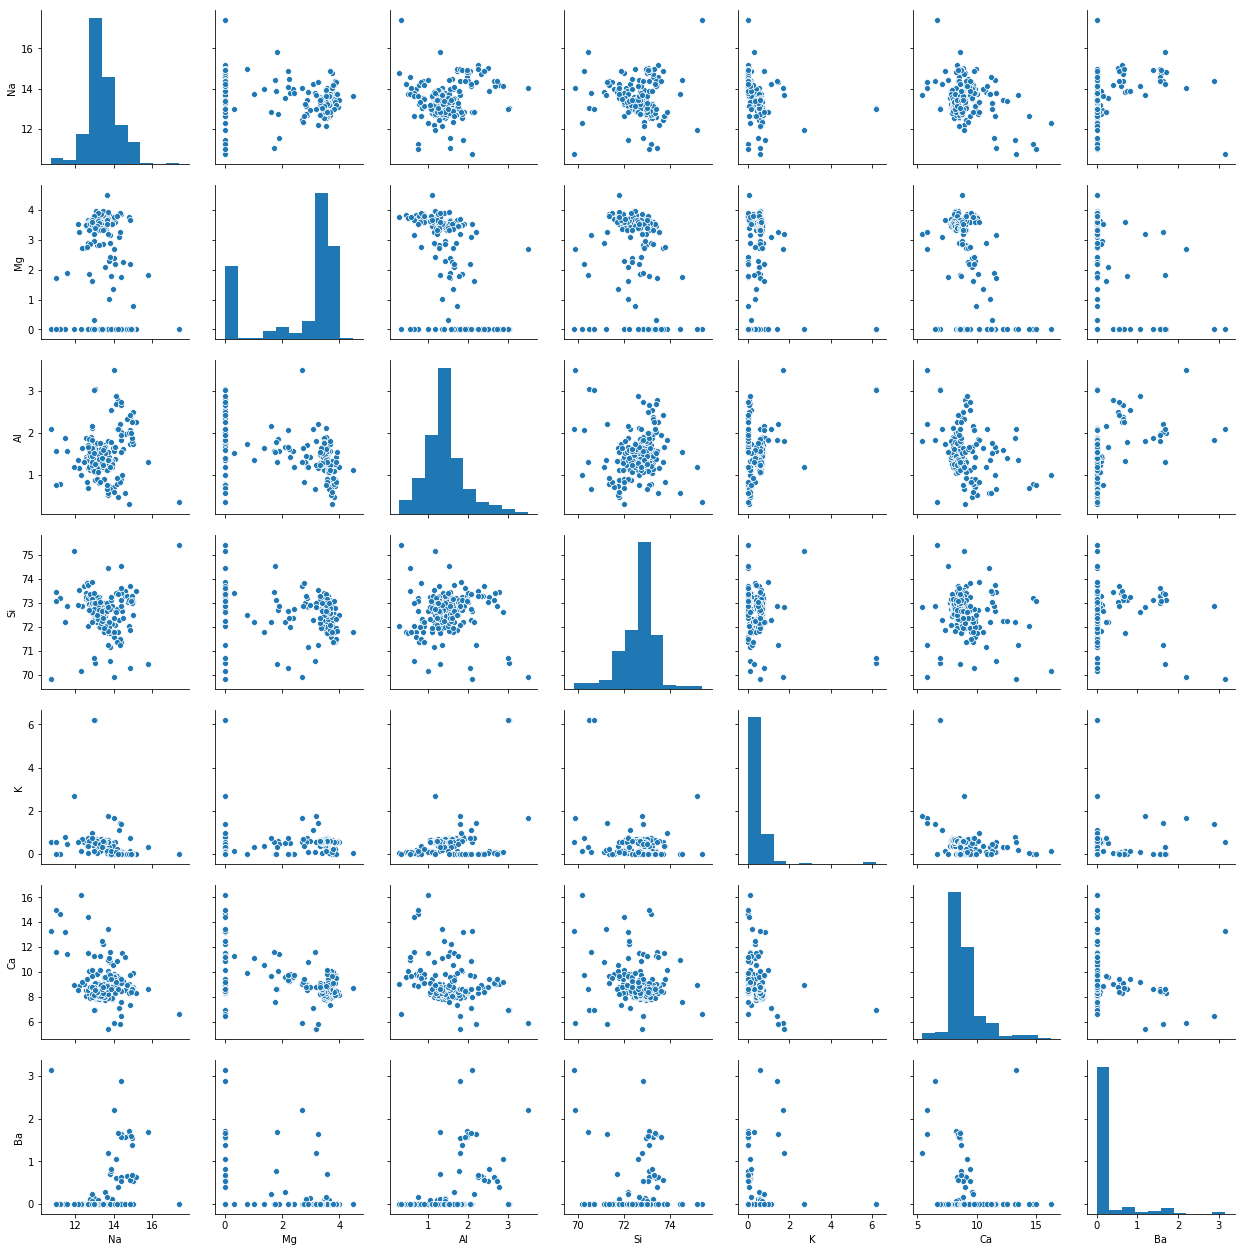

In [41]:
sns.pairplot(glassdata_features_filtered)

## Question 6 - Model - 2 points

*Split the data in test and train sets and build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,6,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [42]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

glassdata_features_filtered_z = glassdata_features_filtered.apply(zscore)  # convert all attributes to Z scale 
#Q: This above leads to data leak as z score is applied together for both test and training dataset. 
#Q: Instead the dataset need to be seperated first and then zscore should be applied. 

print(glassdata_features_filtered_z.describe())






                 Na            Mg            Al            Si             K  \
count  2.140000e+02  2.140000e+02  2.140000e+02  2.140000e+02  2.140000e+02   
mean   2.179980e-15 -2.801497e-16 -3.434428e-16  9.966067e-16  7.470660e-17   
std    1.002345e+00  1.002345e+00  1.002345e+00  1.002345e+00  1.002345e+00   
min   -3.286943e+00 -1.865511e+00 -2.318616e+00 -3.676472e+00 -7.639186e-01   
25%   -6.141580e-01 -3.957744e-01 -5.117560e-01 -4.800288e-01 -5.756501e-01   
50%   -1.323817e-01  5.527787e-01 -1.704602e-01  1.799655e-01  8.905322e-02   
75%    5.120326e-01  6.361680e-01  3.715977e-01  5.649621e-01  1.735820e-01   
max    4.875637e+00  1.254639e+00  4.125851e+00  3.570524e+00  8.780145e+00   

                 Ca            Ba  
count  2.140000e+02  2.140000e+02  
mean  -3.137418e-16 -1.763906e-16  
std    1.002345e+00  1.002345e+00  
min   -2.484084e+00 -3.528768e-01  
25%   -5.049657e-01 -3.528768e-01  
50%   -2.514132e-01 -3.528768e-01  
75%    1.518057e-01 -3.528768e-01  


In [44]:
X = np.array(glassdata_features_filtered_z)
print(X.shape)
y = np.array(glassdata_class)
print(y.shape)

# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)


(214, 7)
(214,)
(149, 7) (65, 7) (149,) (65,)


In [45]:
# Call Nearest Neighbour algorithm
NNH.fit(X_train, y_train)
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='distance')

In [46]:
NNH.score(X_test, y_test)


0.7384615384615385

In [47]:
#predicted_labels = NNH.predict(X_test)
y_predict = NNH.predict(X_test)

# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

NNH.score(X_test, y_test)

0.7384615384615385

In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list([3,6,9])


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    
#Answer
print(pd.DataFrame(cv_scores,k_neighbors))

          0
3  0.610496
6  0.603697
9  0.587306


## Question 7 - Cross Validation - 2 points

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [48]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,20,2))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)
    

print(pd.DataFrame(cv_scores,k_neighbors))


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)
#print(cv_scores,k_neighbors)

           0
1   0.646049
3   0.610496
5   0.611914
7   0.597996
9   0.587306
11  0.599988
13  0.598546
15  0.604796
17  0.584260
19  0.583367
The optimal number of neighbors is 1


## Question 8 - 1 point

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

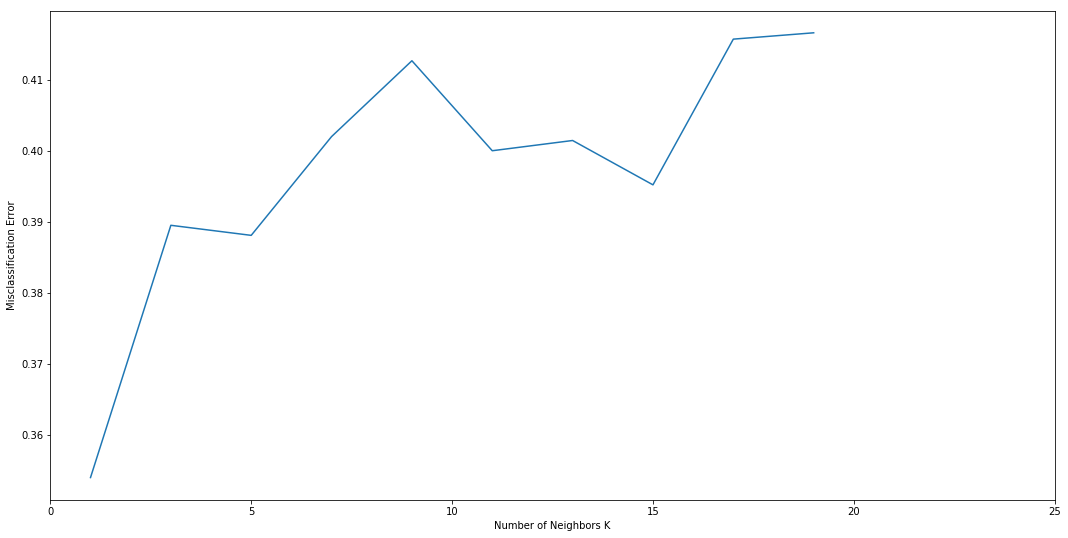

In [49]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()